In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json

persons = json.load(open('persons_result.json', 'r', encoding='utf-8'))

In [ ]:
persons_df = pd.DataFrame(persons.items(), columns=('id', 'bio'))

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(persons_df['bio'])

In [ ]:
# tfidf_matrix.toarray()

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


In [ ]:
all_words_lists =  list(persons.values())
all_words = []
for row in all_words_lists:
  all_words.extend(row.split())

In [ ]:
bio_words_lists = [row.split() for row in all_words_lists]
all_words_as_text = ' '.join(persons.values()).split()

In [ ]:
from collections import Counter
from math import log, log10, log2

idfs = {}
for word in set(all_words):
  idfs[word] = log(len(persons) / len([1 for doc in bio_words_lists if word in doc]))

In [ ]:
sorted(idfs.items(), key=lambda x:x[1])[0]

('участник', 0.3683859808899511)

In [ ]:
tfidfs = {}
for isu_id, doc in persons.items():
  doc = doc.split()
  tfidfs[isu_id] = {word: c / len(doc) * idfs[word] for word, c in Counter(doc).items()}

In [ ]:
def find_global_max_min(data):
  return max([max(row.values()) if row.values() else 0 for row in data.values()]), min([min(row.values()) if row.values() else 1e19 for row in data.values()])

In [ ]:
def normalize(data):
  mx, mn = find_global_max_min(data)
  return {isu_id: {key: (value - mn) / (mx - mn) for key, value in row.items()} for isu_id, row in data.items()}

In [ ]:
norm_tfidfs = normalize(tfidfs)

In [ ]:
words = {}
for isu_id, bio in norm_tfidfs.items():
  for word, metric in bio.items():
      words[word] = words.get(word, []) + [metric]

# Среднее TF-IDF для каждого слова между всеми документами
average_words = {}
for word, row in words.items():
  average_words[word] = sum(row) / len(row)
sorted_average_words = sorted(average_words.items(), key=lambda x:-x[1])

In [ ]:
sorted(average_words.items(), key=lambda x:-x[1])[:5]

[('паспортистка', 1.0),
 ('библиотекарь', 0.7553641957436806),
 ('кастелянша', 0.6663976152561257),
 ('экскурсовод', 0.6663976152561257),
 ('дворник', 0.6663976152561257)]

In [ ]:
mx, mn = max(idfs.values()), min(idfs.values())
norm_idfs = {word: (c - mn) / (mx - mn) for word, c in idfs.items()}

In [ ]:
def make_bar(data, figsize, title, xlabel, ylabel, color='lightgreen'):
  top_words = data
  fontsize = 20
  words, frequencies = zip(*top_words)
  plt.figure(figsize=figsize)
  plt.bar(words, frequencies, color=color)
  plt.title(title, fontsize=fontsize * 2)
  plt.xlabel(xlabel, fontsize=fontsize * 2)
  plt.xticks(rotation=35, ha='right', fontsize=fontsize)
  plt.yticks(fontsize=fontsize)
  plt.ylabel(ylabel, fontsize=fontsize * 2)
  plt.show()


In [ ]:
sorted_average_tfs = sorted(Counter(all_words_as_text).items(), key= lambda x:-x[1])
norm_sorted_average_tfs = [(word, c / len(sorted_average_tfs)) for word, c in sorted_average_tfs]

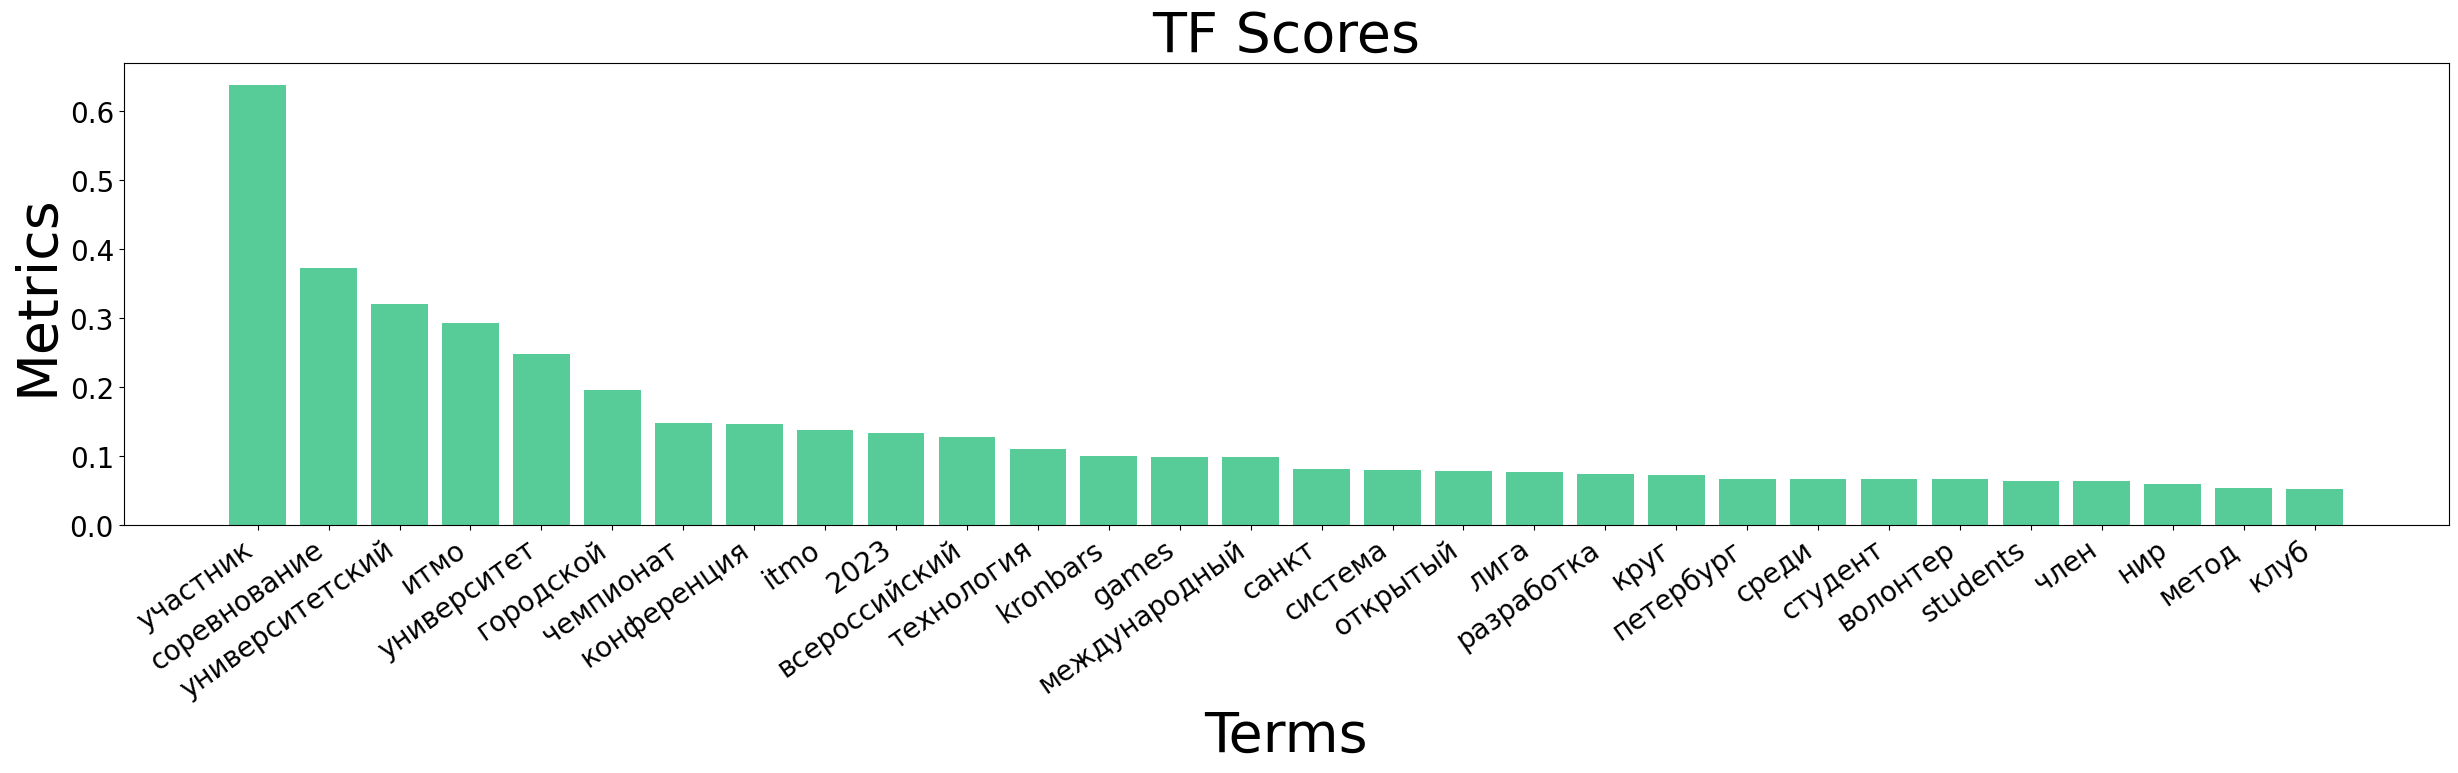

In [ ]:
make_bar(norm_sorted_average_tfs[:30], (30, 6), 'TF Scores', 'Terms', 'Metrics', '#57cc99')

In [ ]:
sorted_norm_idfs = sorted(norm_idfs.items(), key=lambda x:-x[1])

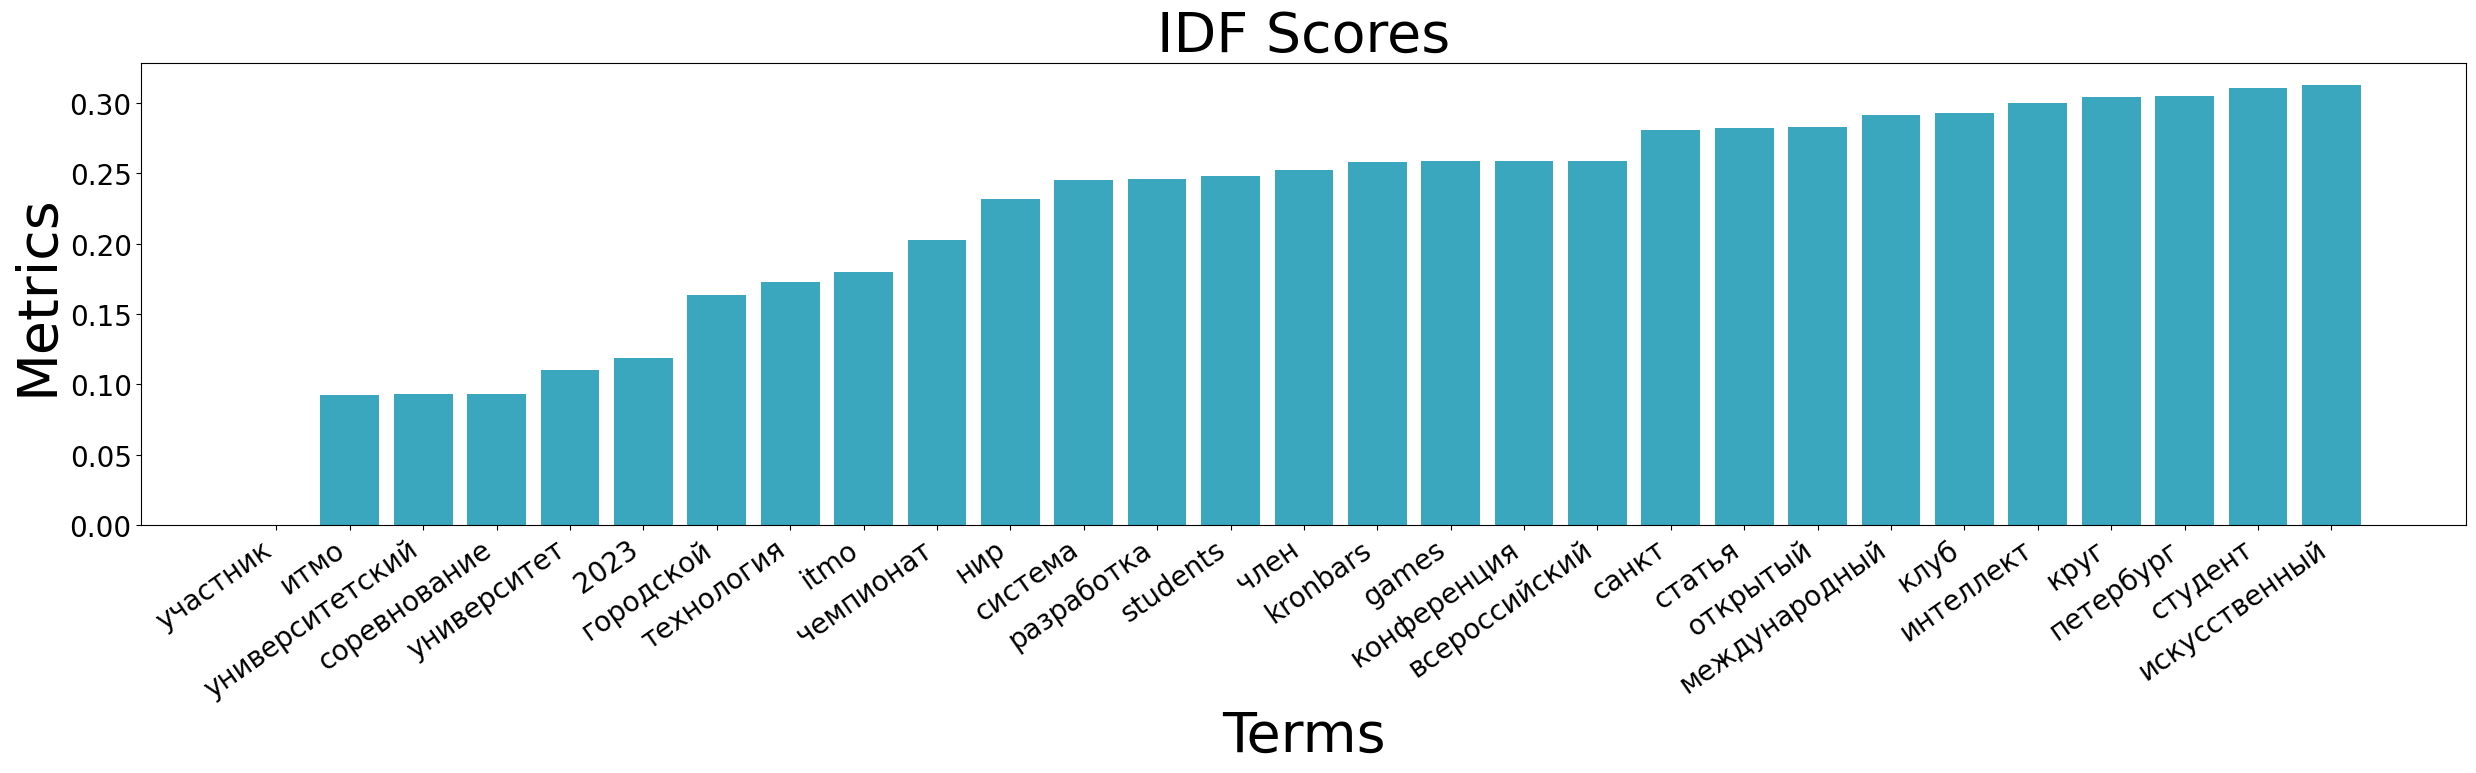

In [ ]:
make_bar(sorted_norm_idfs[:-30:-1], (30, 6), 'IDF Scores', 'Terms', 'Metrics', '#3ba7bf')

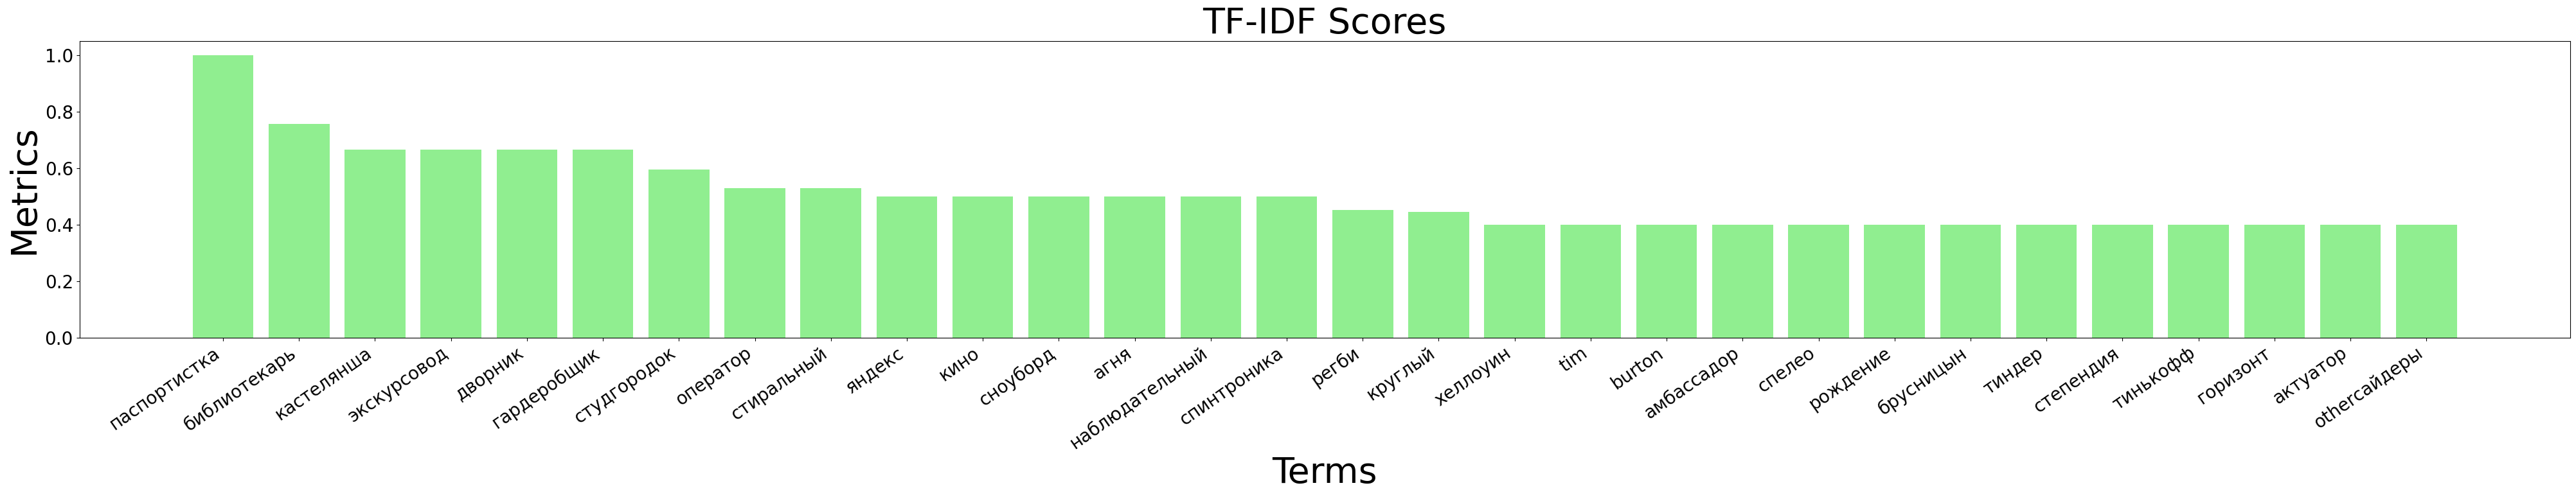

In [ ]:
make_bar(sorted_average_words[:30], (50, 6), 'TF-IDF Scores', 'Terms', 'Metrics')

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(persons.values())

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [ ]:
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]
sorted_keywords[:5]

['пешеходный', 'приз', 'туризм', 'дистанция', 'первокурсник']

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def fit123(rand=0):
  num_clusters = 3
  kmeans = KMeans(n_clusters=num_clusters, random_state=rand)
  kmeans.fit(tfidf_matrix)

In [ ]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
import numpy as np

In [ ]:
for cluster_id in range(num_clusters):
  cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
  print(f'Cluster {cluster_id + 1}:')
  for idx in cluster_indices[:20]:
    print(list(persons.values())[idx])
  print('-' * 100)
  print('-' * 100)

Cluster 1:
фитип разработка программный обеспечение software engineering 2023
фитип компьютерный технология программирование искусственный интеллект 2023
фбит технология защита информация 2023 услуга услуга проведение измерение параметр оптический сигнал квантовый канал квантовый криптографический система выработка распределение ключ ккс врк органзационный защита информация участник ао нии рубин
фсу р робототехника искусственный интеллект 2023
фтми бизнес информатика 2023
член клуб itmo students фтми технология инновация 2023
член клуб itmo students член клуб itmo students фпи кт компьютерный технология дизайн 2023
фитип разработка программный обеспечение software engineering 2023 университетский управление риск век лекция зритель университетский управление риск век лекция зритель
ноц фиои фотоника оптоинформатика 2023
фпи кт системный прикладной программный обеспечение 2023
фпи кт компьютерный технология дизайн 2023
фбт биотехнология 2023 университетский итмо панчлайн концерт зритель 

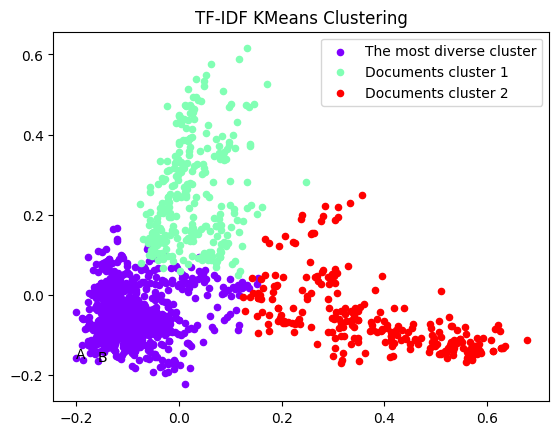

3

In [ ]:
from sklearn.decomposition import PCA

persons_ids = list(persons.keys())


# Уменьшение размерности до 2 компонентов для визуализации
pca = PCA(n_components=2)

tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

# Визуализация кластеров
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

labels = ['The most diverse cluster', 'Documents cluster 1', 'Documents cluster 2']


for label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(kmeans.labels_ == label)
    plt.scatter(tfidf_reduced[cluster_indices, 0], tfidf_reduced[cluster_indices, 1], c=[color], label=labels[label], s=20)

operator = persons_ids.index('409379')
student = persons_ids.index('100186')
plt.annotate('A', xy=tfidf_reduced[operator])
plt.annotate('B', xy=tfidf_reduced[student])

plt.title('TF-IDF KMeans Clustering')
plt.legend()
plt.show()
len(colors)

In [ ]:
persons_ids = list(persons.keys())
minnn = (1e10, 1e10)
midx = 1e9
for idx, v in enumerate(tfidf_reduced):
  if minnn > tuple(v):
    minnn = tuple(v)
    midx = idx
print(minnn, midx)
print(persons_ids[midx], persons[persons_ids[midx]])

(-0.20094425988956233, -0.15895528100110443) 188
409379 член клуб itmo students фбит технология защита информация 2023 международный секция международный научный конференция интеллектуальный информационный технология техника производство конференция волонтер международный секция международный научный конференция интеллектуальный информационный технология техника производство конференция волонтер


In [ ]:
indexes = [i for i in range(len(tfidf_reduced)) if 1 or tfidf_reduced[i, 0] and tfidf_reduced[i, 1]]
print(len(indexes))
mx, mn = 0, 1e9
mxi, mni = 0, 0
for p in indexes:
  person = persons[persons_ids[p]]
  if mx < len(person):
    mx = len(person)
    mxi = persons_ids[p]
  if mn > len(person):
    mn = len(person)
    mni  = persons_ids[p]

  mn = min(mn, len(person))
  # print(persons_ids[p], persons[persons_ids[p]])
print(mxi, mn)

1681
100451 4


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN()
dbscan.fit(tfidf_matrix)

DBSCAN()

In [ ]:
persons_ids = list(persons.keys())
indexes = [i for i in range(len(tfidf_reduced)) if 0 < tfidf_reduced[i, 1] < .2]
print(len(indexes))
for p in indexes:
  print(persons[persons_ids[p]])

In [ ]:
# 104028
# 409605

In [ ]:
operator = persons_ids.index('104028')
student = persons_ids.index('409605')

In [ ]:
clusters = []
list_tfidf_reduced = list([list(el) for el in tfidf_reduced])
for label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(kmeans.labels_ == label)
    clusters.append([list(el) for el in tfidf_reduced[cluster_indices]])

all_words = []
for cluster in clusters:
  words = []
  for vector in cluster:
    words.append([vector, persons_ids[list_tfidf_reduced.index(vector)]])
  all_words.append(words)

In [ ]:
cluster = all_words[0]
counter = set()
for vector, id_ in sorted(cluster, key=lambda x:-x[0][0]):
  print(persons[id_])
  counter.add(id_)
  if len(counter) >= 10:
    break
print('-' * 100)

университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник
фитип разработка программный обеспечение software engineering 2023 университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник
фикт программирование инфокоммуникационный система 2023 университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник
центр хи биоинженерия 2023 университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник университетский открытый турнир университет итмо баскетбол basket lab x соревнование участник
фсу р робототехника искусственный интеллект 2021 университетский открытый турнир университет итмо 

In [ ]:
cluster = all_words[0]
print(len(cluster))
words_cluster_0 = {}
for vector, id_ in cluster:
  for word in persons[id_].split():
    words_cluster_0[word] = words_cluster_0.get(word, []) + [average_words.get(word, 0)]
sorted_cluster_0 = sorted([(word, sum(count) / len(count)) for word, count in words_cluster_0.items()], key= lambda x:-x[1])
sorted_cluster_0[:10]


1142


[('паспортистка', 1.0),
 ('библиотекарь', 0.7553641957436806),
 ('кастелянша', 0.6663976152561257),
 ('экскурсовод', 0.6663976152561257),
 ('дворник', 0.6663976152561257),
 ('гардеробщик', 0.6663976152561257),
 ('студгородок', 0.5949838316392418),
 ('оператор', 0.5285127907510897),
 ('стиральный', 0.5285127907510897),
 ('яндекс', 0.49959642288418876)]

In [ ]:
cluster = all_words[1]
print(len(cluster))
counter = set()
for vector, id_ in sorted(cluster, key=lambda x:-x[0][0]):
  print(persons[id_])
  counter.add(id_)
  if len(counter) >= 10:
    break
print('-' * 100)


281
городской открытый чемпионат университет итмо плавание соревнование участник городской открытый чемпионат университет итмо плавание соревнование участник
городской чемпионат санкт петербург среди студент баскетбол круг мужчина соревнование участник городской чемпионат санкт петербург среди студент баскетбол круг мужчина соревнование участник
городской открытый кубок университет итмо бальный танец соревнование участник городской открытый кубок университет итмо бальный танец соревнование участник
университетский мастер класс плавание среди студент университет итмо соревнование участник университетский мастер класс плавание среди студент университет итмо соревнование участник
член сборный команда itmo students фитип разработка программный обеспечение software engineering 2023 городской чемпионат санкт петербург среди студент баскетбол мужчина круг соревнование участник городской чемпионат санкт петербург среди студент баскетбол мужчина круг соревнование участник
университетский турнир

In [ ]:
cluster = all_words[1]
print(len(cluster))
words_cluster_0 = {}
for vector, id_ in cluster:
  for word in persons[id_].split():
    words_cluster_0[word] = words_cluster_0.get(word, []) + [average_words.get(word, 0)]
sorted_cluster_0 = sorted([(word, sum(count) / len(count)) for word, count in words_cluster_0.items()], key= lambda x:-x[1])
sorted_cluster_0[:10]


281


[('регби', 0.45289565575355933),
 ('спелео', 0.39951570746102655),
 ('итф', 0.3327952305122516),
 ('нация', 0.28513774697741245),
 ('парламентский', 0.232689181162511),
 ('многоборье', 0.23165464528075666),
 ('художественный', 0.22953427237623908),
 ('гимнастика', 0.22953427237623908),
 ('bottlebattle', 0.2215944355976269),
 ('румба', 0.2215944355976269)]

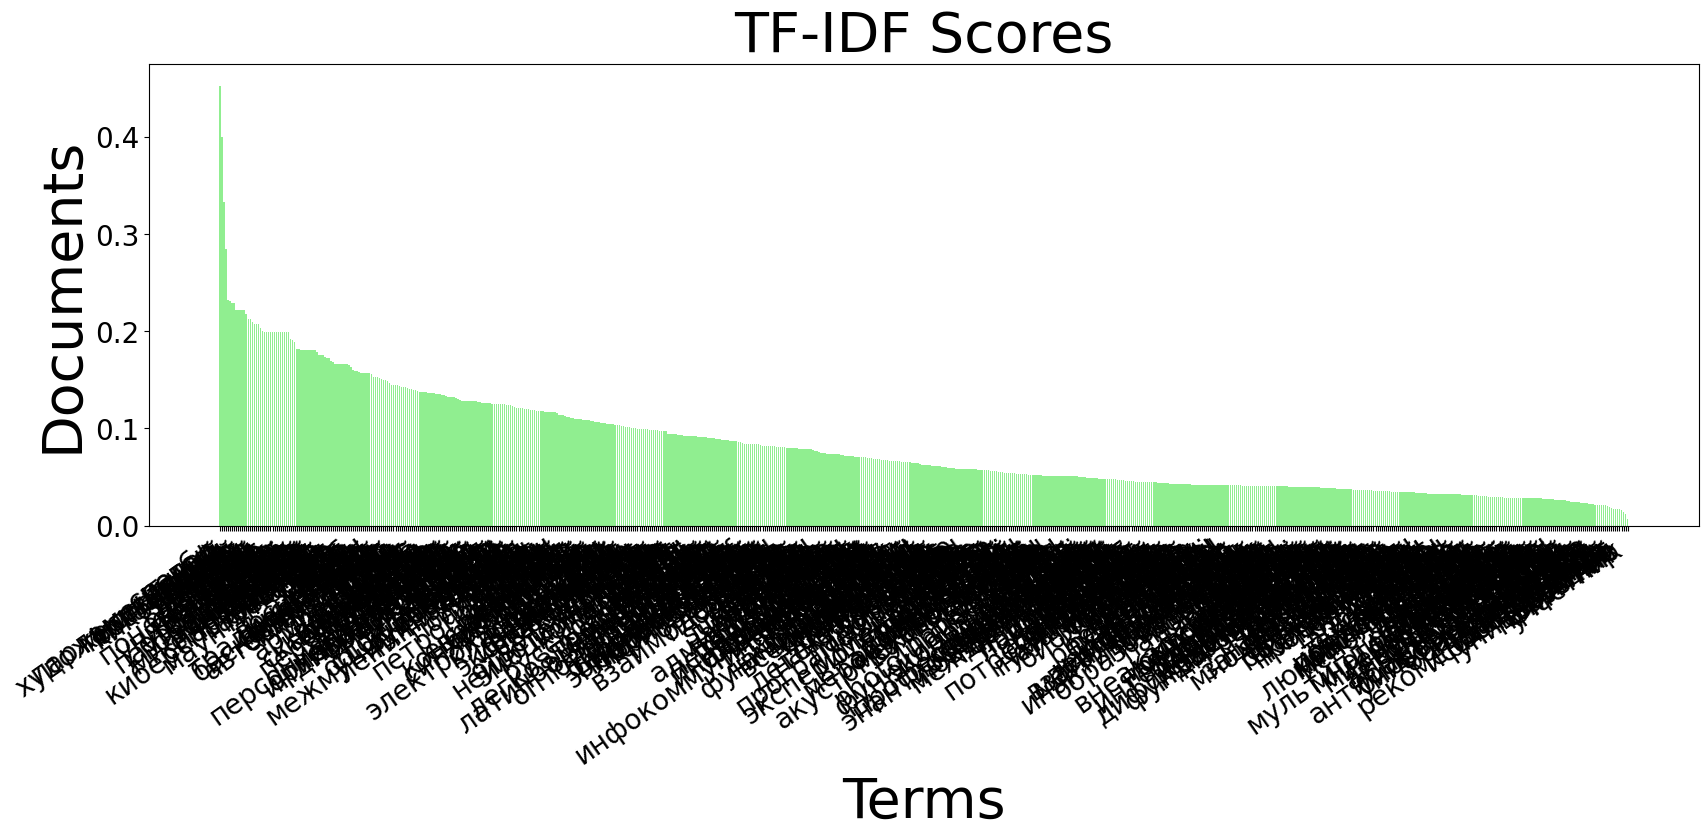

In [ ]:
make_bar(sorted_cluster_0, (20, 6), 'TF-IDF Scores', 'Terms', 'Documents')

In [ ]:
cluster = all_words[2]
print(len(cluster))
words_cluster_0 = {}
for vector, id_ in cluster:
  for word in persons[id_].split():
    words_cluster_0[word] = words_cluster_0.get(word, []) + [average_words.get(word, 0)]
sorted_cluster_0 = sorted([(word, sum(count) / len(count)) for word, count in words_cluster_0.items()], key= lambda x:-x[1])
sorted_cluster_0[:10]


258


[('civilization', 0.28513774697741245),
 ('genshin', 0.28513774697741245),
 ('электроинженерия', 0.25273265134833206),
 ('naruto', 0.2493946343262831),
 ('impact', 0.22964506671323173),
 ('rocket', 0.2215944355976269),
 ('суперлига', 0.2215944355976269),
 ('кроссфит', 0.18559823375536647),
 ('пауэрлифтинг', 0.18219902122458528),
 ('боулинг', 0.18115778290139975)]